# Первый computational notebook

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

Каждый пронумерованный элемент будет представлять собой новую ячейку. Нажмите `SHIFT
+ENTER`, чтобы запустить ячейку и создать новую ячейку ниже. Выбрав ячейку, нажмите
`ESCAPE` для перехода в командный режим. Используйте клавиши `M` и `Y` для изменения ячеек
на разметку и код.

# Подсчёт числа Pi с помощью метода Монте-Карло

## Формулы
- площадь квадрата: $S = (2 r)^2$
- площадь круга: $C = \pi r^2$
- $C/S = (\pi r^2) / (4 r^2) = \pi / 4$
- $\pi = 4 * C/S$

![](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)




In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
num_points = 1000

In [3]:
points = []
hits = 0 
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x,y,"red"))
    else:
        points.append((x,y,"blue"))

Pi =  3.132


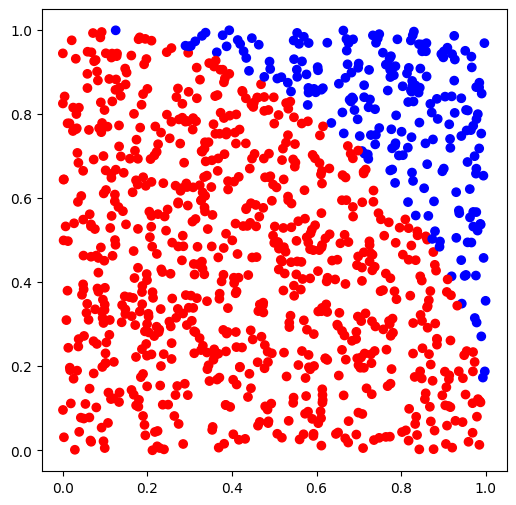

In [4]:
x, y, colors = zip(*points)

fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)

ax.scatter(x,y, c = colors)

fraction = hits / num_points
print("Pi = ", 4* fraction)

## Блокноты и контроль версий

### Упражнение: что происходит без `requirements.txt`?

In [17]:
!python -m pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Консольные команды, виджеты оболочки и немного магии (cell magic)

### Давайте попробуем виджеты

In [7]:
from matplotlib import pyplot
import random
from ipywidgets import interact, widgets

%matplotlib inline

def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

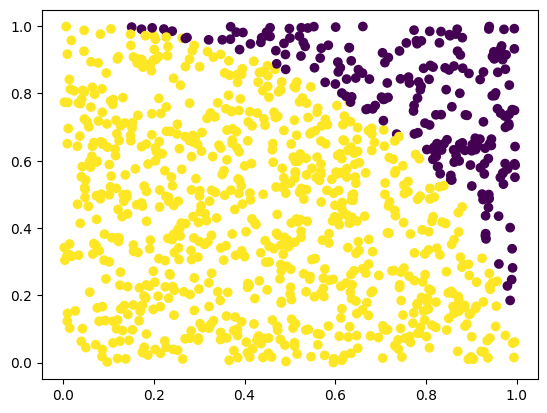

In [8]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))

### Виджеты для интерактивной подгонки данных (data fitting)

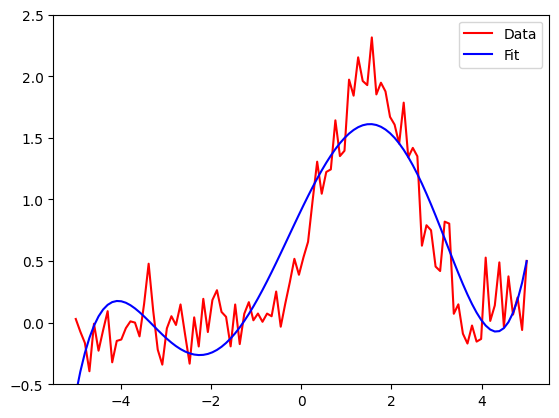

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)


def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y


def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit


def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()


x, y = noisy_gaussian()
yfit = fit(x, y, n=5)  # fit a 5th order polynomial to it
plot(x, y, yfit)

In [17]:
interact(plot, 
         x=widgets.IntSlider(min=3, max=30, step=3, value=9), 
         y=widgets.IntSlider(min=3, max=30, step=3, value=9), 
         yfit=widgets.IntSlider(min=3, max=30, step=3, value=9))

interactive(children=(IntSlider(value=9, description='x', max=30, min=3, step=3), IntSlider(value=9, descripti…

<function __main__.plot(x, y, yfit)>

### Профилирование ячеек

Это упражнение посвящено профилированию ячеек, но ещё и включает в себя практику
работы с магией (cell magic) и ячейками.

1. Скопируйте и вставьте в ячейку следующий код:

```python
import numpy as np
import matplotlib.pyplot as plt


def step():
    import random
    return 1. if random.random() > .5 else -1.


def walk(n):
    x = np.zeros(n)
    dx = 1. / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0.
        else:
            x[i + 1] = x_new
    return x


n = 100000
x = walk(n)

```

2. Разделите функции на 4 ячейки (либо через меню `Edit`, либо с помощью сочетания клавиш
`Ctrl-Shift-Minus`)
3. Постройте траекторию случайного движения с помощью `plt.plot(x)`
4. Засеките выполнение `walk()` с помощью `%timeit`. Например `t1 = %timeit -o walk(n)`
5. Запустите профилировщик ячеек обрезки: `%%prun` и `walk(n)`
6. Можете ли вы заметить небольшую ошибку, которая замедляет работу кода?
7. В следующем упражнении вы установите линейный профилировщик, который
позволит легче выявить ошибку в производительности.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [87]:
def step():
    return 1 if random.random() > .5 else -1

In [88]:
def walk(n):
    x = np.zeros(n)
    dx = 1 / n
    for i in range(n - 1):
        x_new = x[i] + dx * step()
        if x_new > 5e-3:
            x[i + 1] = 0
        else:
            x[i + 1] = x_new
    return x

48.1 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 

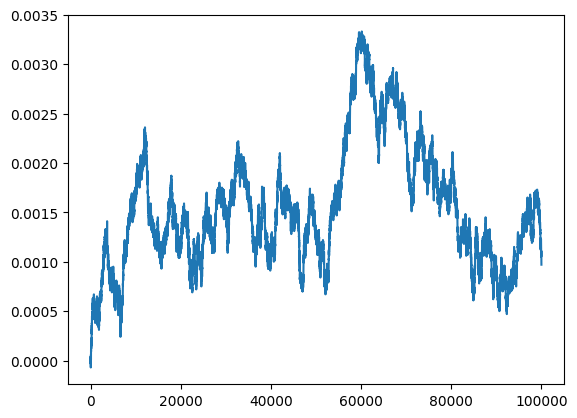

Timer unit: 1e-07 s

Total time: 0.0279836 s
File: C:\Users\Mansvl\AppData\Local\Temp\ipykernel_20360\1491881381.py
Function: walk at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def walk(n):
     2         1        132.0    132.0      0.0      x = np.zeros(n)
     3         1          8.0      8.0      0.0      dx = 1 / n
     4     10000      41102.0      4.1     14.7      for i in range(n - 1):
     5      9999     152390.0     15.2     54.5          x_new = x[i] + dx * step()
     6      9999      40140.0      4.0     14.3          if x_new > 5e-3:
     7                                                       x[i + 1] = 0
     8                                                   else:
     9      9999      46056.0      4.6     16.5              x[i + 1] = x_new
    10         1          8.0      8.0      0.0      return x

In [89]:
n = 100000
x = walk(n)
plt.plot(x)
t1 = %timeit -o walk(n)
%prun walk(n)
%lprun -f walk walk(10000)

### Установка команды для профилирования строк

In [73]:
%load_ext line_profiler


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


Для избежания данной проблемы нужно сделать import random в начале кода, а не внутри функции step!
